# Template of  jupyter notebook for analysis of SAXS/WAXS/GiSAXS/GiWAXS

## Load package

In [1]:
%matplotlib notebook
from pyScatt.packages import *
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })
plt.rcParams.update({ 'image.interpolation': 'none'   })
T = True
F = False

## Define IO

In [2]:
#inDir =  '/home/group/NSLSII_Data/SMI/2020_Cycle1/AB_CUNNY/AB2_1/'
inDir = '/home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/308052_Dinca/1M/'
print('The input dir is: %s'%inDir)



The input dir is: /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/308052_Dinca/1M/


In [3]:
outDir = '/home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/308052_Dinca/Results/'

outDir = create_fullpath(  outDir )

outDir_HDF =  create_dir(  'HDF_Results/', outDir )
outDir_PDF =  create_dir(  'PDF_Report/', outDir )

Directory  /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/308052_Dinca/Results/  already exists
Directory  /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/308052_Dinca/Results/HDF_Results/  already exists
Directory  /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/308052_Dinca/Results/PDF_Report/  already exists


## Organize Data 
* the sorting method heavly relies on data acquisition strategy
* Currently, there is no general method for sorting

In [4]:
username_ = 'Dinca'


flist = ls_dir( inDir, and_list=[  username_,  ], no_list=[ 'Cell' ])
_, flists = sort_fnlist( flist,  cut_beg = -24, cut_end=-9, method = 'cut_from_end' ) #for waxs

#flists_clean = drop_xyz_float_filenames( flists, pattern_characters = ['_x', '_y', '_z', '_w' ] )
flists_clean = drop_xyz_float_filenames( flists, pattern_characters = ['_x', '_y', '_d'  ] )

Nf = len( flists)
print('There are %s files for user: %s in this run.'%(Nf, username_))

There are 11 files for user: Dinca in this run.


In [5]:
flist

array(['_Dinca_TIBA_COF_CTAB_x45400.0_y-5019.89_det5000.0m_expt0.1s_attNone_sid00268297_000001_SAXS.tif',
       '_Dinca_Mn_PDI_32_x13900.0_y-5019.9_det5000.0m_expt0.1s_attNone_sid00268292_000001_SAXS.tif',
       '_Dinca_PDI_Ligand_x-5400.0_y-5019.9_det5000.0m_expt0.1s_attNone_sid00268289_000001_SAXS.tif',
       '_Dinca_NiBHT_Pos_x32799.99_y-5019.9_det5000.0m_expt0.1s_attNone_sid00268295_000001_SAXS.tif',
       '_Dinca_NiBHT_Neg_x26500.0_y-5019.9_det5000.0m_expt0.1s_attNone_sid00268294_000001_SAXS.tif',
       '_Dinca_TIBQ_COF_DMA_x39200.0_y-5019.9_det5000.0m_expt0.1s_attNone_sid00268296_000001_SAXS.tif',
       '_Dinca_Mn_PDI_x-11600.03_y-5019.9_det5000.0m_expt0.1s_attNone_sid00268288_000001_SAXS.tif',
       '_Dinca_Zn_PDI_x-17999.95_y-5019.77_det5000.0m_expt0.1s_attNone_sid00268287_000001_SAXS.tif',
       '_Dinca_NiBHT_x20200.0_y-5019.9_det5000.0m_expt0.1s_attNone_sid00268293_000001_SAXS.tif',
       '_Dinca_Zn_PDI_2_x7600.0_y-5019.9_det5000.0m_expt0.1s_attNone_sid00268291_00000

In [6]:
flists_clean

array(['_Dinca_Zn_PDI_x-18000_y-5020_det5000.0m_expt0.1s_attNone_sid00268287_000001_SAXS.tif',
       '_Dinca_Mn_PDI_x-11600_y-5020_det5000.0m_expt0.1s_attNone_sid00268288_000001_SAXS.tif',
       '_Dinca_PDI_Ligand_x-5400_y-5020_det5000.0m_expt0.1s_attNone_sid00268289_000001_SAXS.tif',
       '_Dinca_RW_1315_x1100_y-5020_det5000.0m_expt0.1s_attNone_sid00268290_000001_SAXS.tif',
       '_Dinca_Zn_PDI_2_x7600_y-5020_det5000.0m_expt0.1s_attNone_sid00268291_000001_SAXS.tif',
       '_Dinca_Mn_PDI_32_x13900_y-5020_det5000.0m_expt0.1s_attNone_sid00268292_000001_SAXS.tif',
       '_Dinca_NiBHT_x20200_y-5020_det5000.0m_expt0.1s_attNone_sid00268293_000001_SAXS.tif',
       '_Dinca_NiBHT_Neg_x26500_y-5020_det5000.0m_expt0.1s_attNone_sid00268294_000001_SAXS.tif',
       '_Dinca_NiBHT_Pos_x32800_y-5020_det5000.0m_expt0.1s_attNone_sid00268295_000001_SAXS.tif',
       '_Dinca_TIBQ_COF_DMA_x39200_y-5020_det5000.0m_expt0.1s_attNone_sid00268296_000001_SAXS.tif',
       '_Dinca_TIBA_COF_CTAB_x45400_y-5

### Using a two-layered dict to sort the files 

In [7]:
#%run -i /home/yuzhang/Software/pyScatt/pyScatt/generic_functions.py

In [8]:
cut_pattern= r'(_x)'

sam_dict, sams = get_Unique_SamDict_from_list( flists, sam_list_clean=flists_clean, 
                                               cut_pattern= cut_pattern, starting_point=  0     )   
#ks =  sorted(list(sams.keys()))
ks =   list(sams.keys()) 
N = len(ks)
print( 'There are %s samples.'%(N))

There are 11 samples.


In [9]:
sams

{'_Dinca_Zn_PDI': 1,
 '_Dinca_Mn_PDI': 1,
 '_Dinca_PDI_Ligand': 1,
 '_Dinca_RW_1315': 1,
 '_Dinca_Zn_PDI_2': 1,
 '_Dinca_Mn_PDI_32': 1,
 '_Dinca_NiBHT': 1,
 '_Dinca_NiBHT_Neg': 1,
 '_Dinca_NiBHT_Pos': 1,
 '_Dinca_TIBQ_COF_DMA': 1,
 '_Dinca_TIBA_COF_CTAB': 1}

In [10]:
ks[5] #, sam_dict[ks[0]]

'_Dinca_Mn_PDI_32'

##  Load Mask if has one

<IPython.core.display.Javascript object>


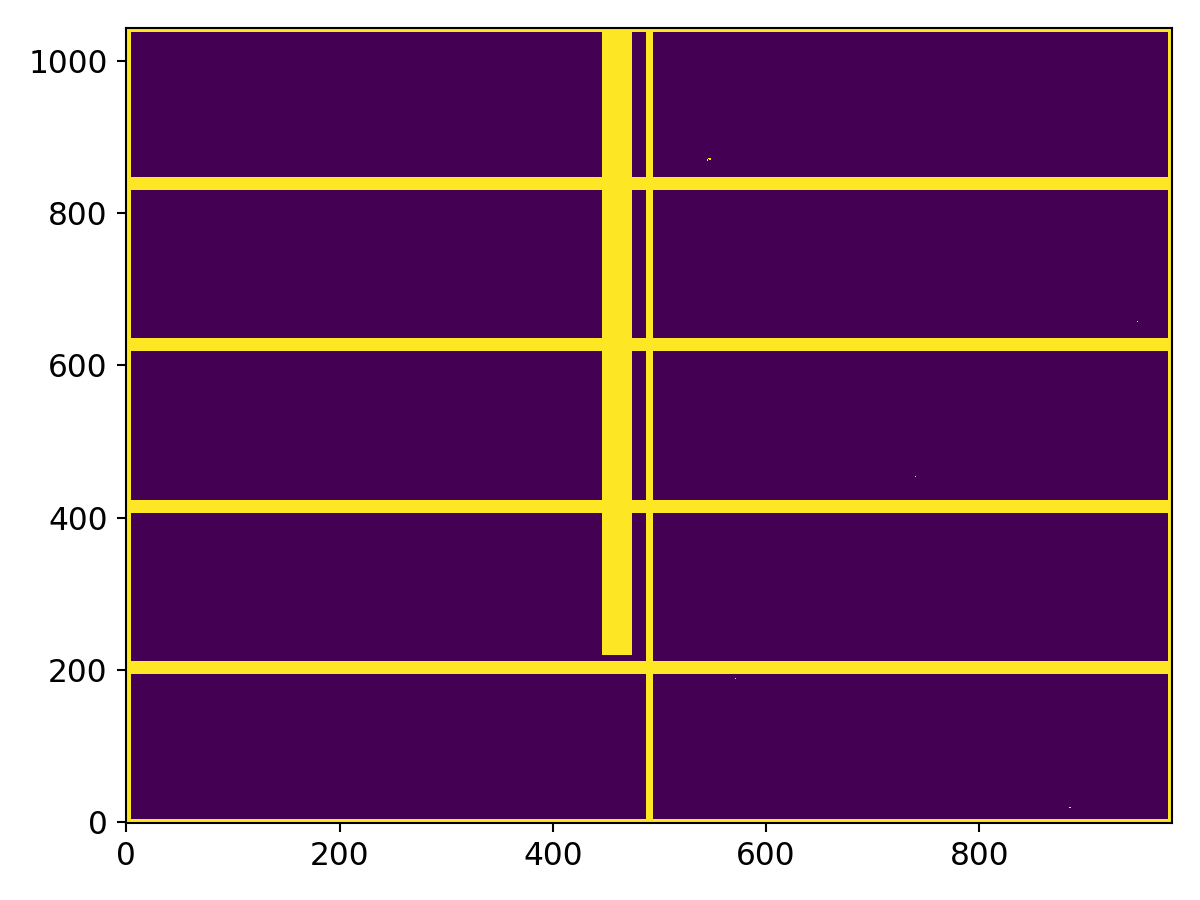

In [11]:
#mask  =np.load( '/home/yuzhang/NSLSII_Data_Link/SMI/2020_Cycle3/308052_Zhang/Mask/mask_waxs_2020C3_YG.npy')
mask  =np.load( '/home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/Mask/mask_saxs_2021_C1.npy')



show_img(mask)
#mask = None

## Define data analysis parameters and methods

### A SAXS

In [12]:
username = 'Dinca'
beamline = 'SMI'
cycle='2021_C1'


#geometry   =  'Reflection'
geometry   = 'Transmission'
wav_m = 1E-10 * (12.398/16.1)
sdd_mm = 5000.00
b_xy = [ 459, 567 ]
bs_xy = bs=[ 459+1, 220  ]
incident_angle = 0
det_str = 'Pilatus1m'
hotpixel_thres = 1e6
  
pargs_sc = dict( wav_m = wav_m, 
                sdd_mm = sdd_mm, 
                b_xy =b_xy, 
                bs_xy = bs_xy, 
                incident_angle = incident_angle,             
                det_str = det_str, 
                bs_kind = None, 
                useqx = True,
                geometry =  geometry,                
                username = username, 
                cycle =  cycle, 
                beamline = beamline, 
                outDir = outDir, )
              # mask = mask )    

## Setup the class
SC = SMI_Scattering( pargs_sc  )
#SC.set_rotation_angles( rot_angle  ) 


### Methods

In [13]:
do_plot = T #True 
#do_inpait = True, make it True, the circular average does not use inpaited data 
do_show_plot = T
save_raw = F
do_qimg = F
do_ciravg = F
save_raw= F
check_stitch = F
do_stitch = F
do_Qciravg = F
show_Qciravg_roi = F 
do_Qciravg_sector = F   
show_Qciravg_sector = F 
do_Qqphi = F 
do_q_qphi = F
do_p_qphi = F    


if T:    
    ###########################
    #for SAXS
    ########################### 
    save_raw= F
    do_qimg = F
    do_plot_raw = T # True
    do_ciravg = T #False  #True  
    do_ciravg_sector = F #False  #True
    #for the angle range, the v-up is ~0, l-left, ~90;  v-down ~ 180/-180; h-right -90, 
    ciravg_sector_angle_wid = 20 
    ciravg_sector_angles = [  0, 90, 180, -90   ]
    show_ciravg_sector = F    
    do_qphi = F 
    do_q_qphi = F
    do_p_qphi = F
    

    
    
    

In [14]:
#%matplotlib inline

In [15]:
sample_list = ks[ : ]
#sample_list = [ ks[ 0 ] ]
#sample_list = ks   #use a dummy papemill to run this
print( sample_list, sam_dict[sample_list[0]]  )

['_Dinca_Zn_PDI', '_Dinca_Mn_PDI', '_Dinca_PDI_Ligand', '_Dinca_RW_1315', '_Dinca_Zn_PDI_2', '_Dinca_Mn_PDI_32', '_Dinca_NiBHT', '_Dinca_NiBHT_Neg', '_Dinca_NiBHT_Pos', '_Dinca_TIBQ_COF_DMA', '_Dinca_TIBA_COF_CTAB'] ['_Dinca_Zn_PDI_x-17999.95_y-5019.77_det5000.0m_expt0.1s_attNone_sid00268287_000001_SAXS.tif']


In [16]:
#%run -i /home/yuzhang/Software/pyScatt/pyScatt/generic_functions.py
#%run -i /home/yuzhang/Software/pyScatt/pyScatt/Scattering_Functions.py
#%run -i /home/yuzhang/Software/pyScatt/pyScatt/Scattering.py
%run -i /home/yuzhang/Software/pyScatt/pyScatt/Pipeline_Funcs.py

In [81]:
pz

1400

The sample is: _Dinca_Zn_PDI.
The filelist for this sample is: ['_Dinca_Zn_PDI_x-17999.95_y-5019.77_det5000.0m_expt0.1s_attNone_sid00268287_000001_SAXS.tif'].
Directory  /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/308052_Dinca/Results/SAXS/  already exists


<IPython.core.display.Javascript object>


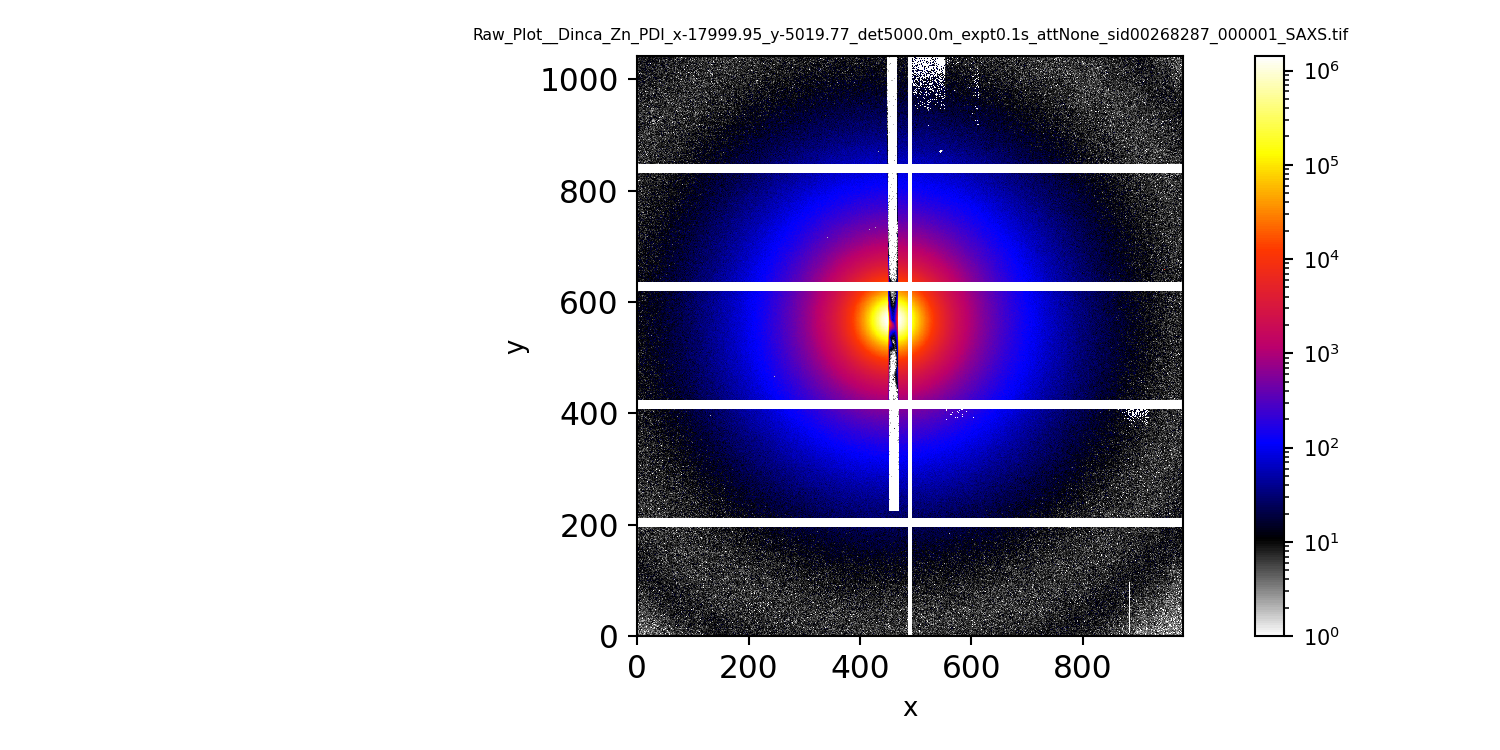

/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg__Dinca_Zn_PDI_x-17999.95_y-5019.77_det5000.0m_expt0.1s_attNone_sid00268287_000001_SAXS.tif.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/308052_Dinca/Results/SAXS/Cir_Avg/


<IPython.core.display.Javascript object>


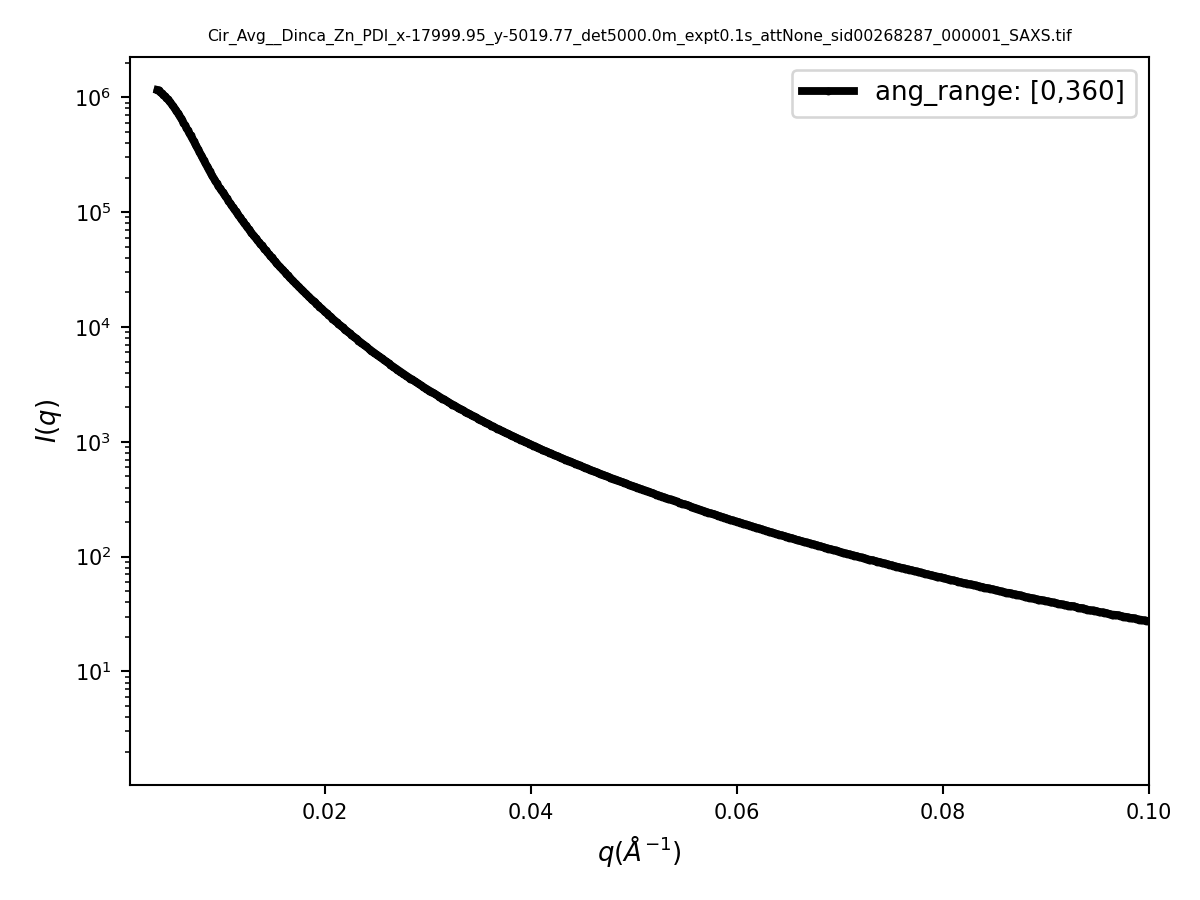

The sample is: _Dinca_Mn_PDI.
The filelist for this sample is: ['_Dinca_Mn_PDI_x-11600.03_y-5019.9_det5000.0m_expt0.1s_attNone_sid00268288_000001_SAXS.tif'].
Directory  /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/308052_Dinca/Results/SAXS/  already exists


<IPython.core.display.Javascript object>


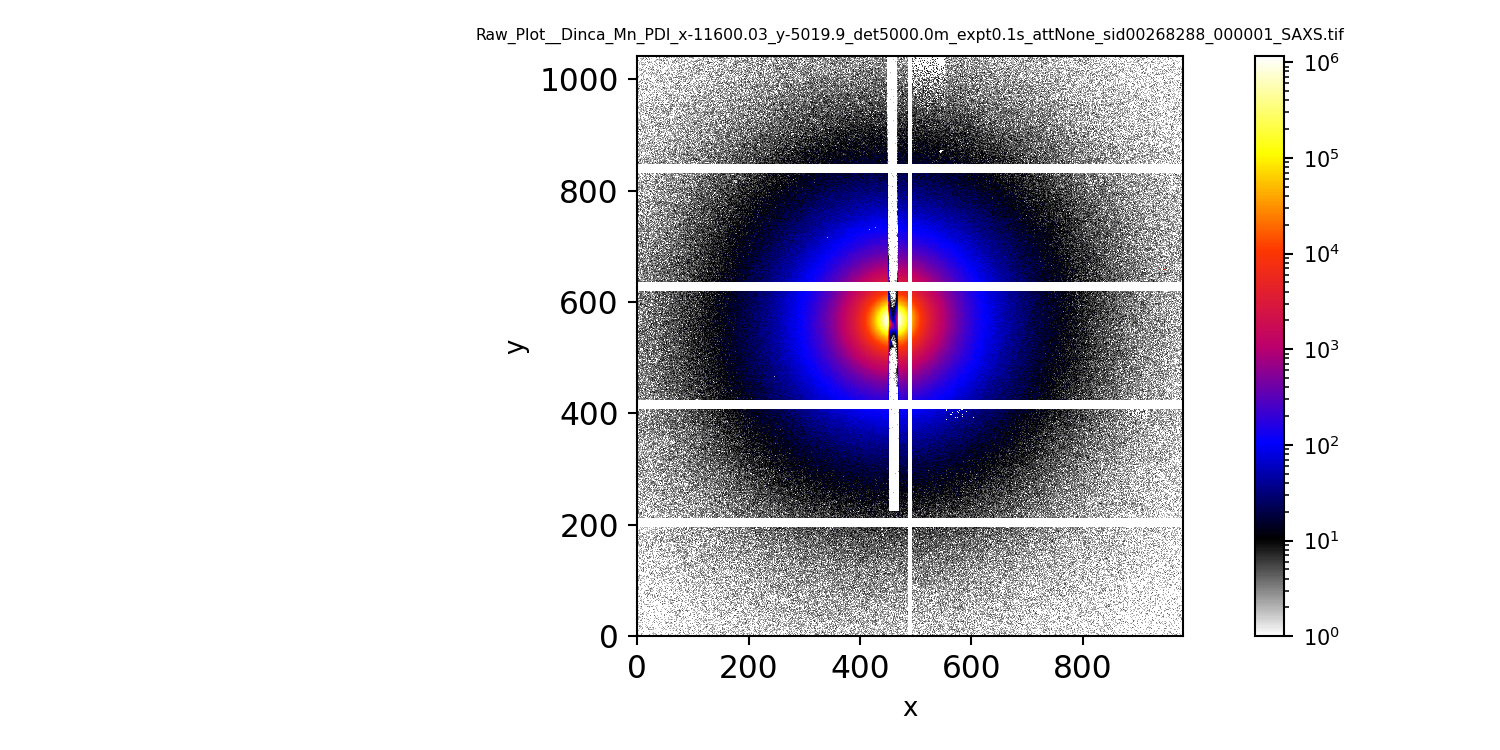

/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg__Dinca_Mn_PDI_x-11600.03_y-5019.9_det5000.0m_expt0.1s_attNone_sid00268288_000001_SAXS.tif.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/308052_Dinca/Results/SAXS/Cir_Avg/


<IPython.core.display.Javascript object>


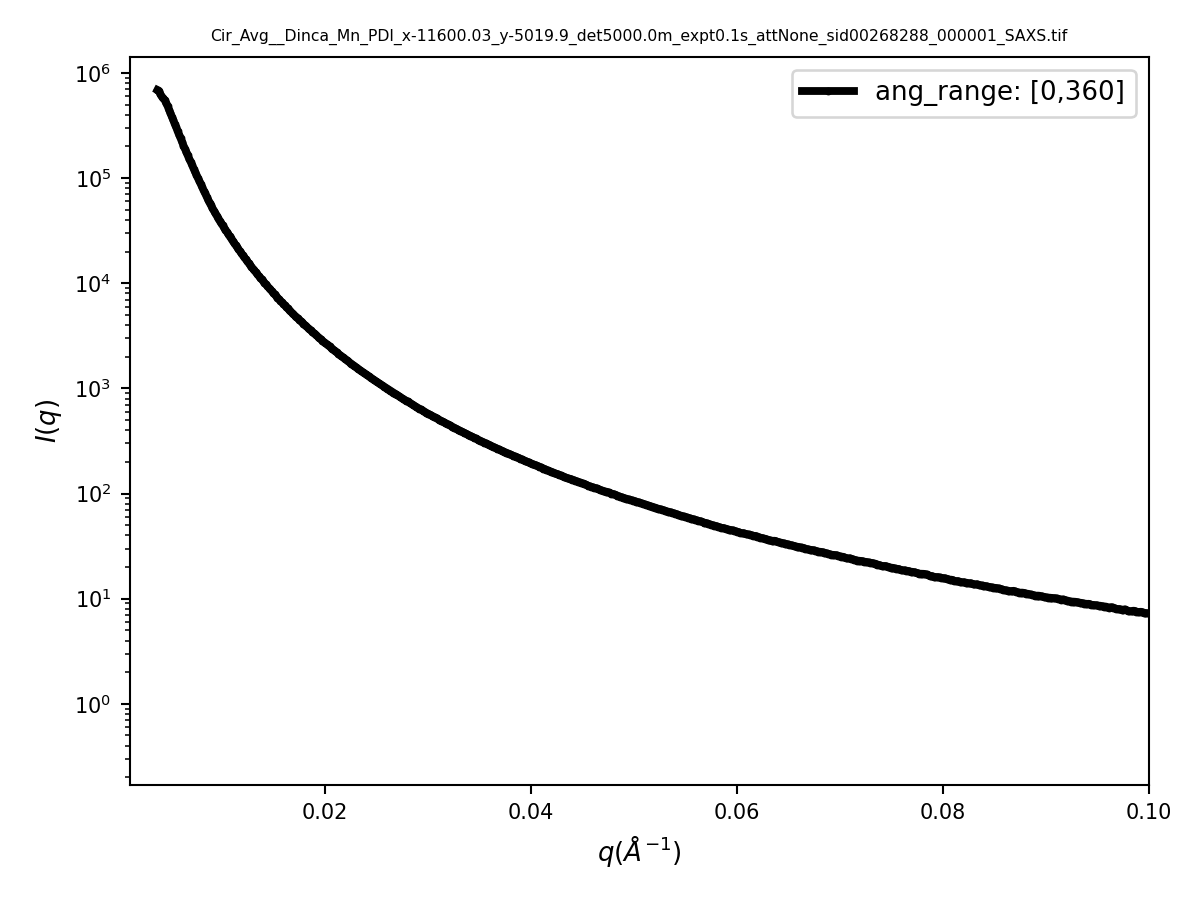

The sample is: _Dinca_PDI_Ligand.
The filelist for this sample is: ['_Dinca_PDI_Ligand_x-5400.0_y-5019.9_det5000.0m_expt0.1s_attNone_sid00268289_000001_SAXS.tif'].
Directory  /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/308052_Dinca/Results/SAXS/  already exists


<IPython.core.display.Javascript object>


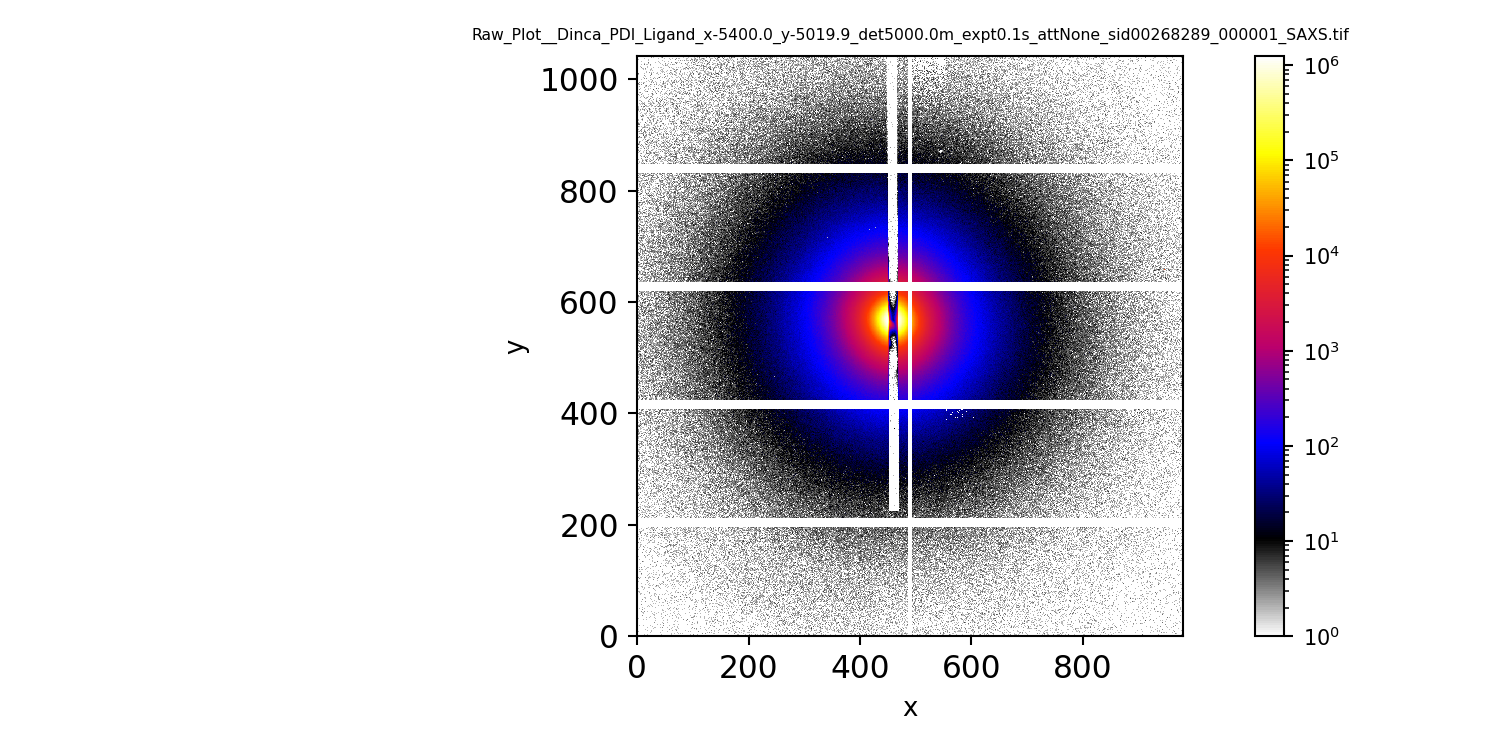

/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg__Dinca_PDI_Ligand_x-5400.0_y-5019.9_det5000.0m_expt0.1s_attNone_sid00268289_000001_SAXS.tif.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/308052_Dinca/Results/SAXS/Cir_Avg/


<IPython.core.display.Javascript object>


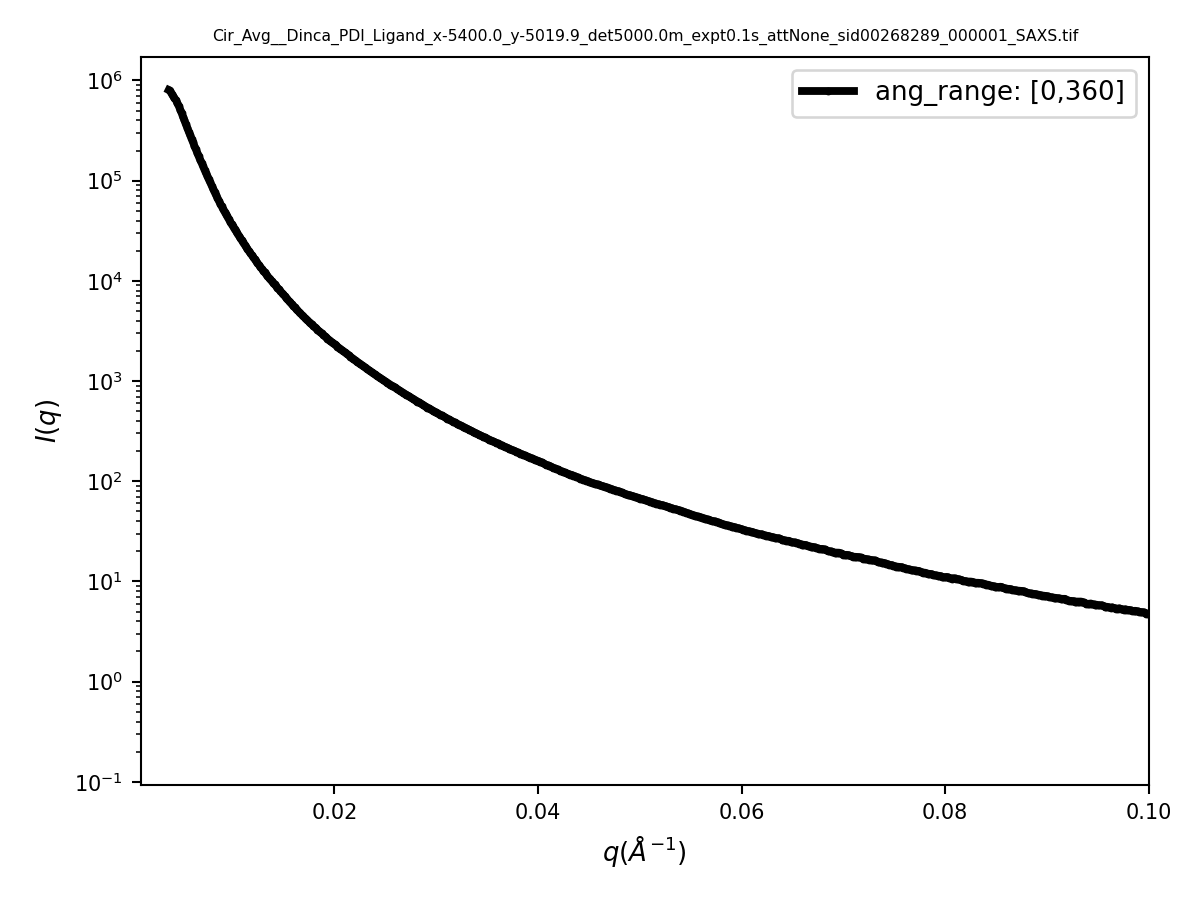

The sample is: _Dinca_RW_1315.
The filelist for this sample is: ['_Dinca_RW_1315_x1100.0_y-5019.89_det5000.0m_expt0.1s_attNone_sid00268290_000001_SAXS.tif'].
Directory  /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/308052_Dinca/Results/SAXS/  already exists


<IPython.core.display.Javascript object>


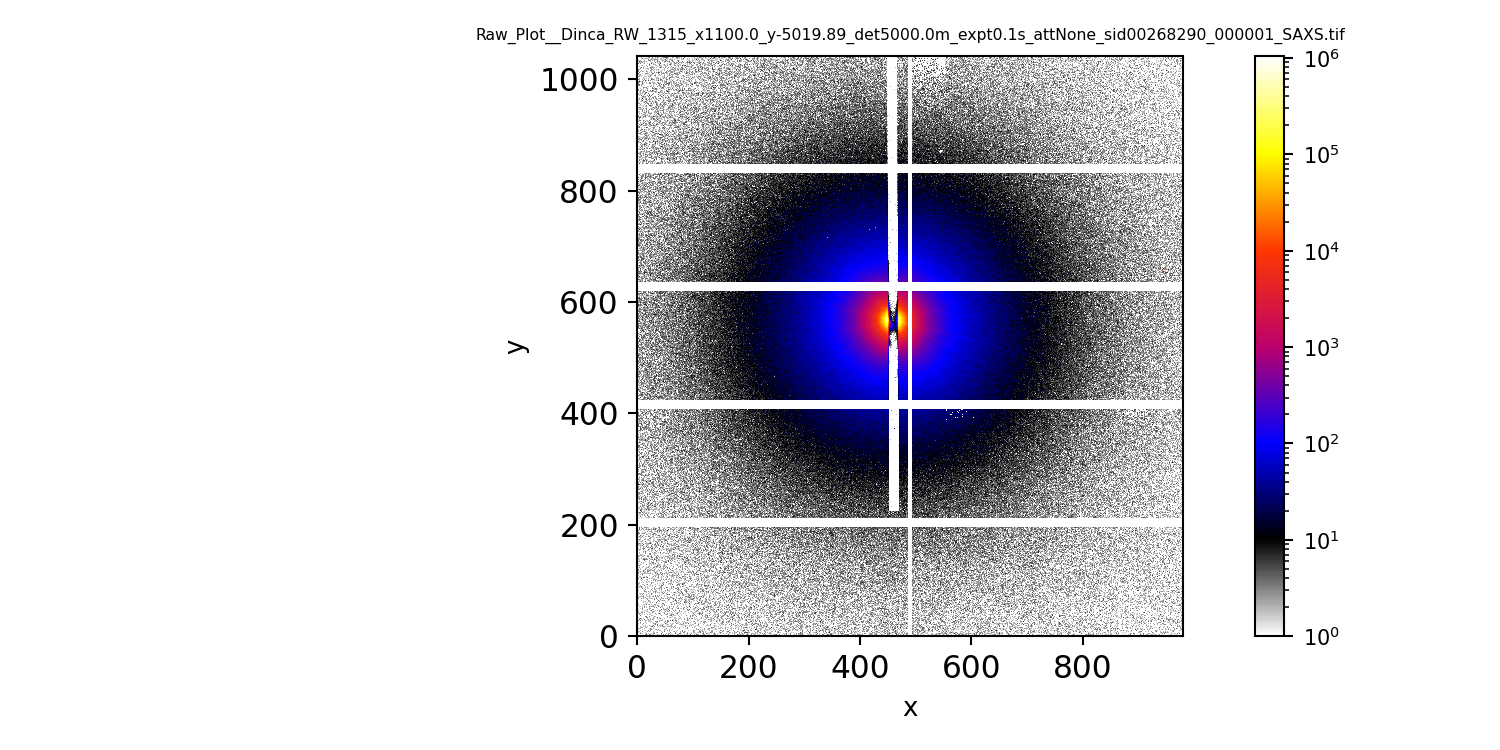

/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg__Dinca_RW_1315_x1100.0_y-5019.89_det5000.0m_expt0.1s_attNone_sid00268290_000001_SAXS.tif.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/308052_Dinca/Results/SAXS/Cir_Avg/


<IPython.core.display.Javascript object>


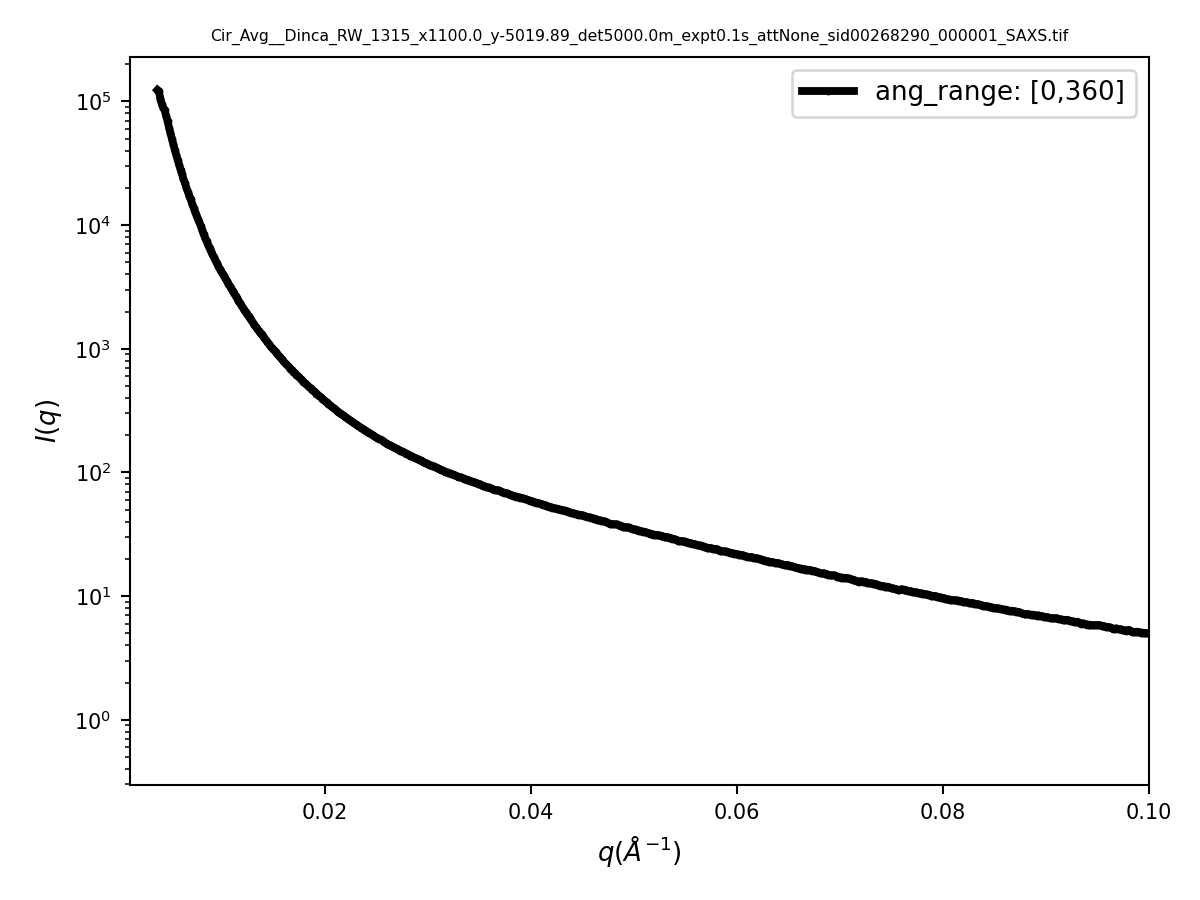

The sample is: _Dinca_Zn_PDI_2.
The filelist for this sample is: ['_Dinca_Zn_PDI_2_x7600.0_y-5019.9_det5000.0m_expt0.1s_attNone_sid00268291_000001_SAXS.tif'].
Directory  /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/308052_Dinca/Results/SAXS/  already exists


<IPython.core.display.Javascript object>


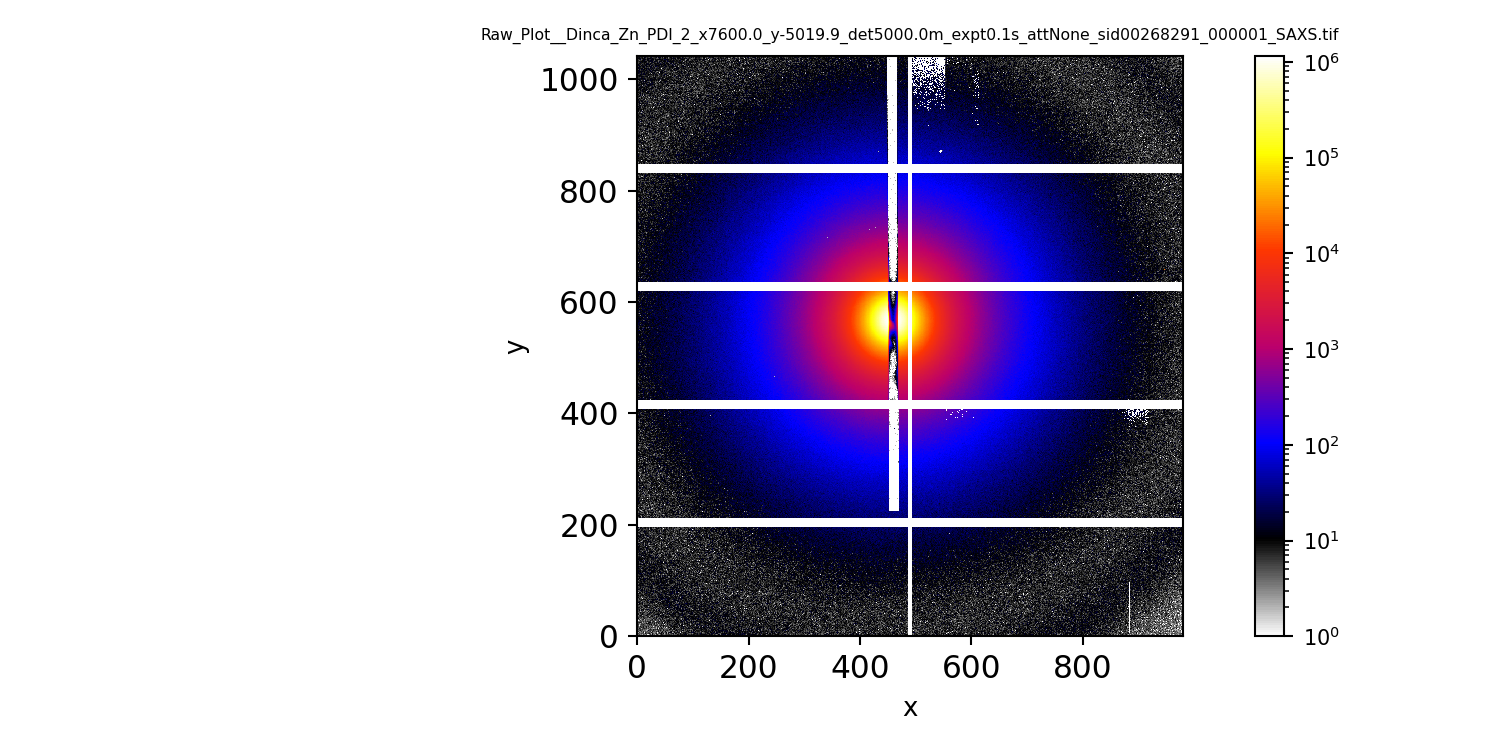

/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg__Dinca_Zn_PDI_2_x7600.0_y-5019.9_det5000.0m_expt0.1s_attNone_sid00268291_000001_SAXS.tif.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/308052_Dinca/Results/SAXS/Cir_Avg/


<IPython.core.display.Javascript object>


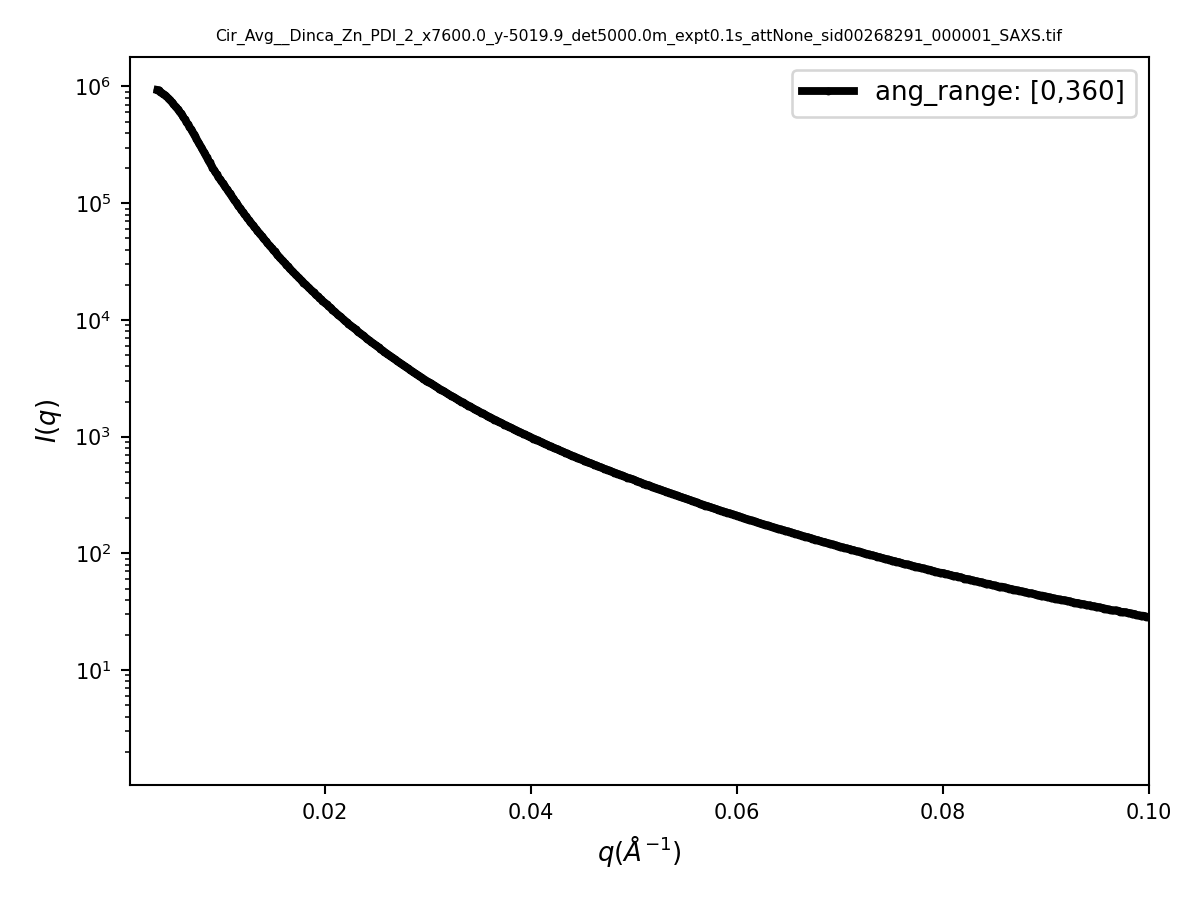

The sample is: _Dinca_Mn_PDI_32.
The filelist for this sample is: ['_Dinca_Mn_PDI_32_x13900.0_y-5019.9_det5000.0m_expt0.1s_attNone_sid00268292_000001_SAXS.tif'].
Directory  /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/308052_Dinca/Results/SAXS/  already exists


<IPython.core.display.Javascript object>


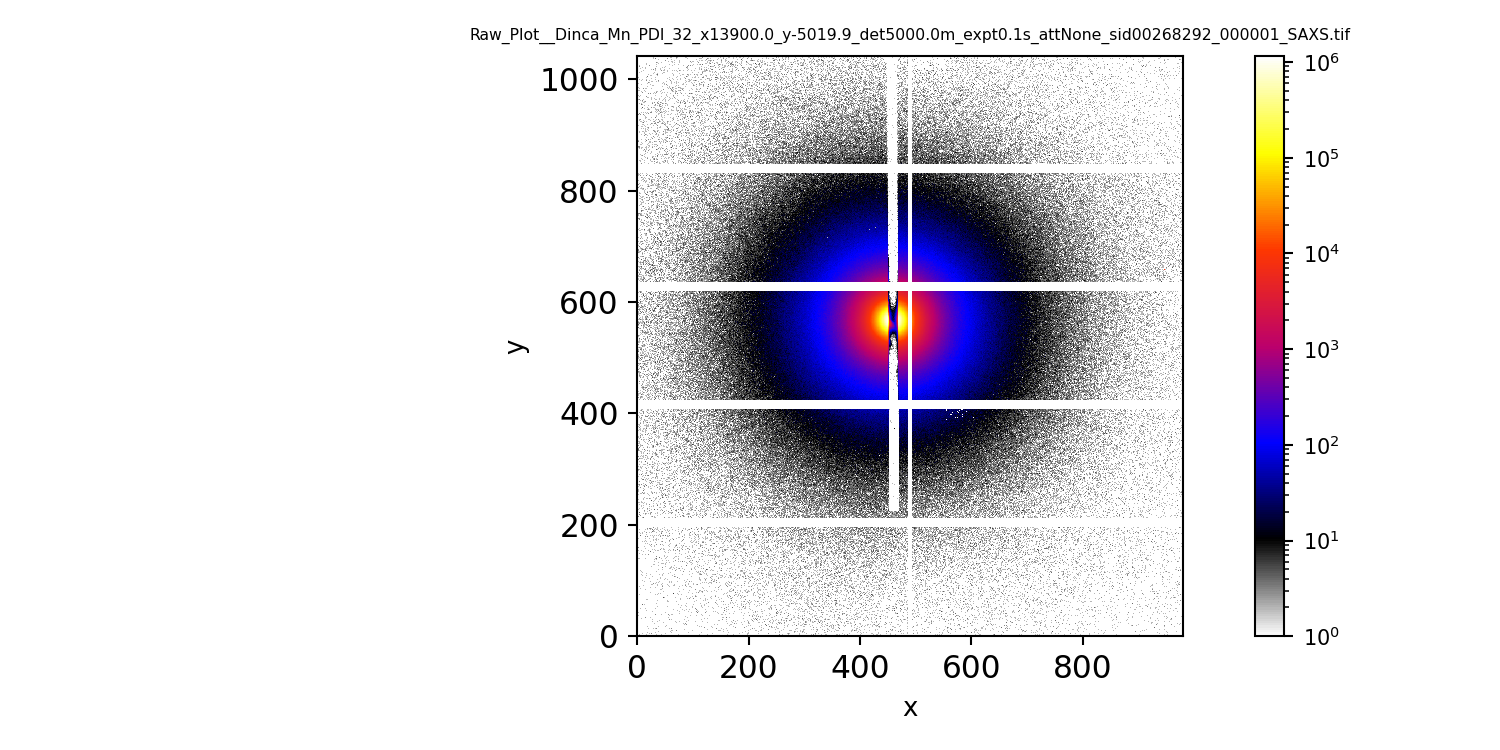

/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg__Dinca_Mn_PDI_32_x13900.0_y-5019.9_det5000.0m_expt0.1s_attNone_sid00268292_000001_SAXS.tif.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/308052_Dinca/Results/SAXS/Cir_Avg/


<IPython.core.display.Javascript object>


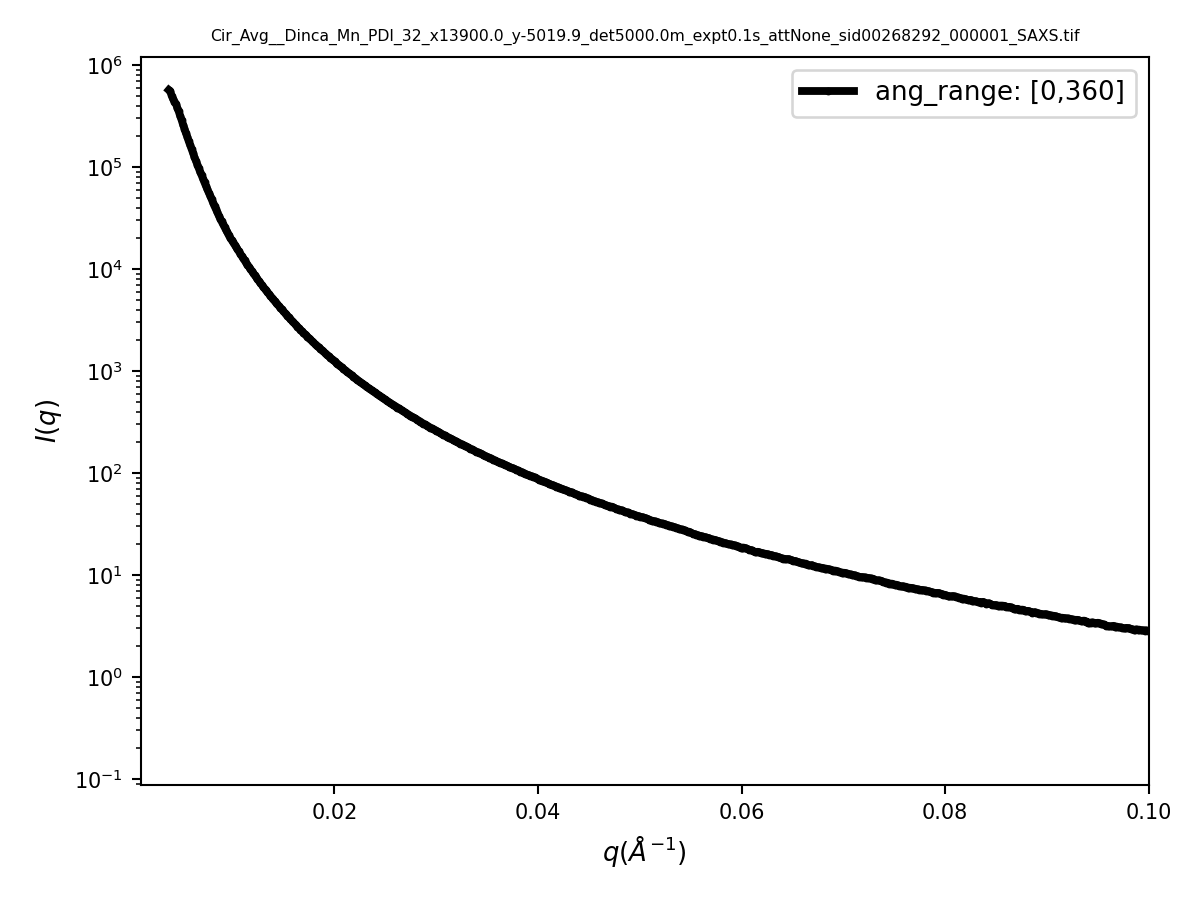

The sample is: _Dinca_NiBHT.
The filelist for this sample is: ['_Dinca_NiBHT_x20200.0_y-5019.9_det5000.0m_expt0.1s_attNone_sid00268293_000001_SAXS.tif'].
Directory  /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/308052_Dinca/Results/SAXS/  already exists


<IPython.core.display.Javascript object>


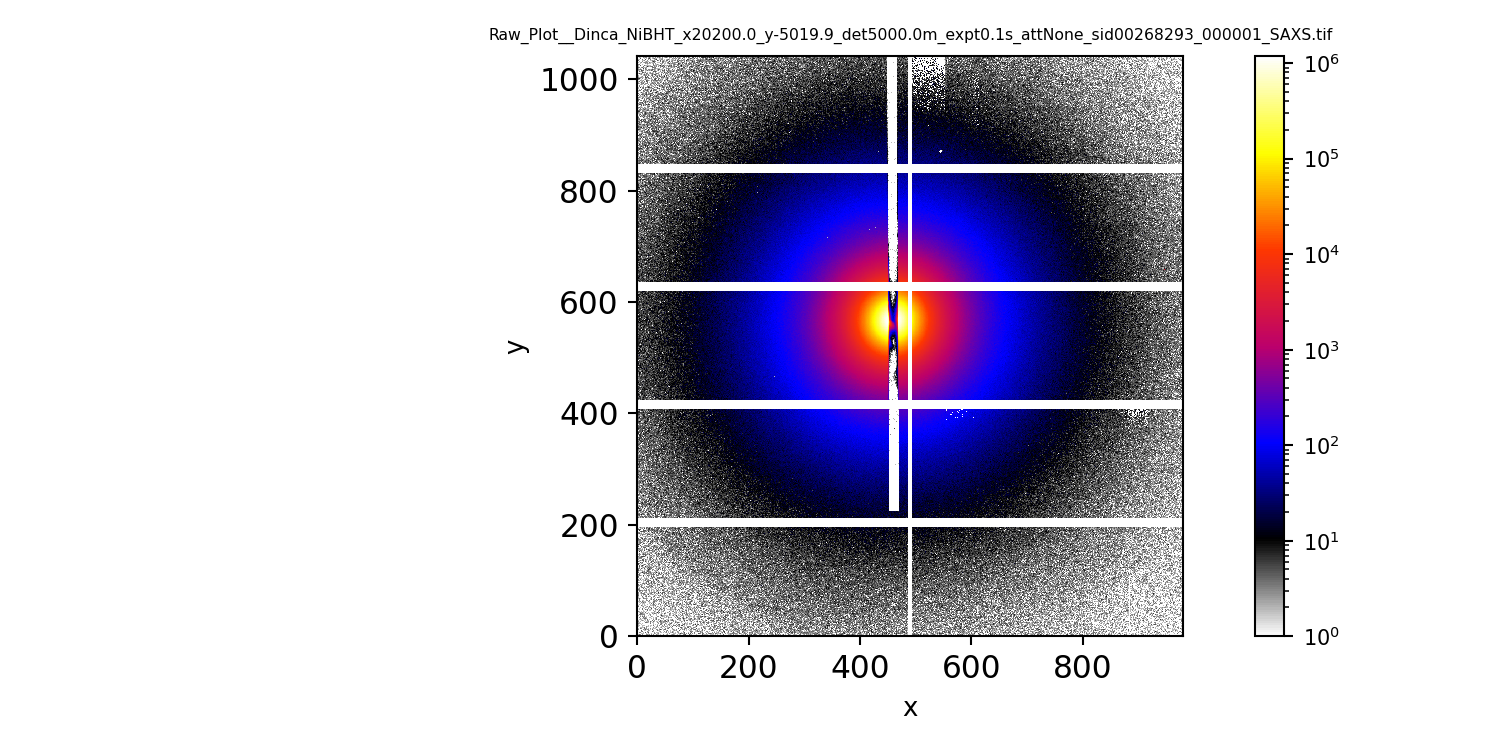

/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg__Dinca_NiBHT_x20200.0_y-5019.9_det5000.0m_expt0.1s_attNone_sid00268293_000001_SAXS.tif.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/308052_Dinca/Results/SAXS/Cir_Avg/


<IPython.core.display.Javascript object>


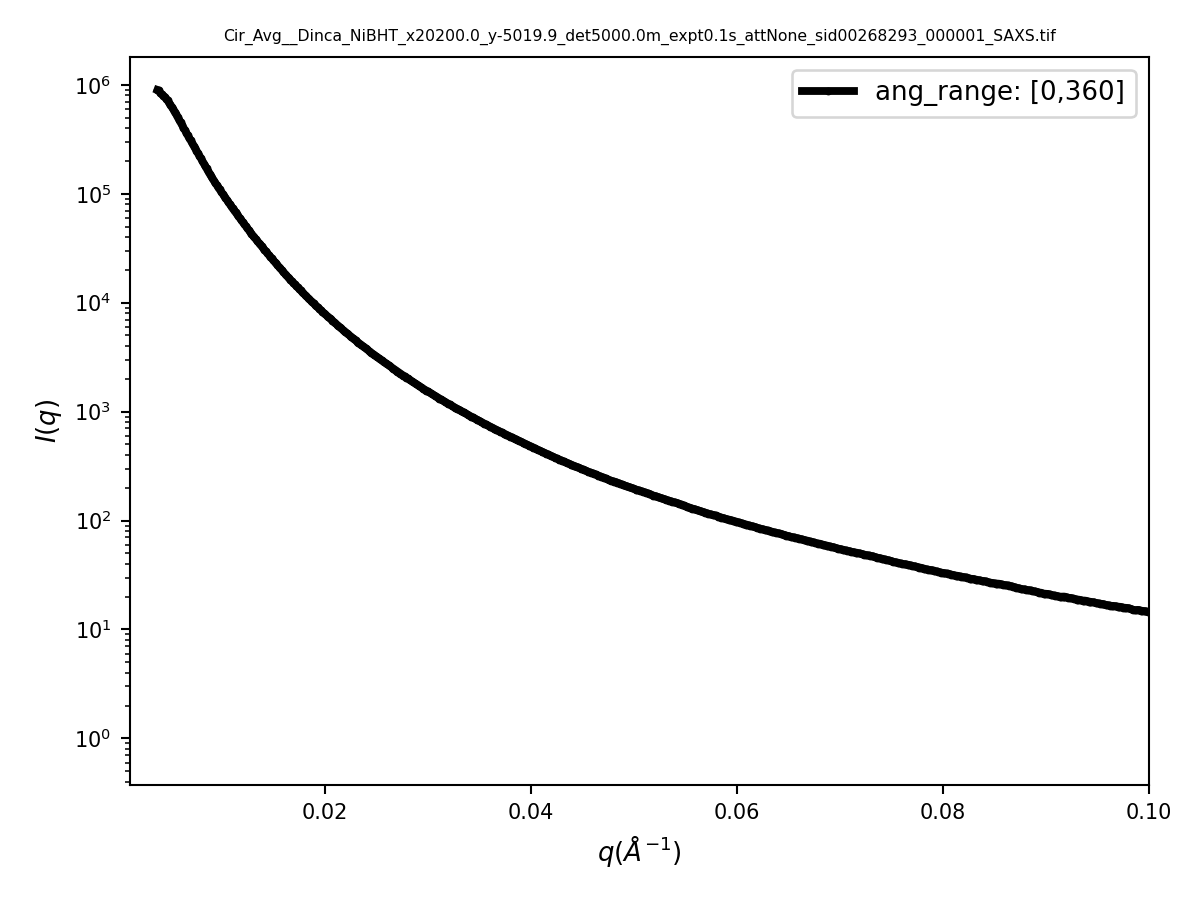

The sample is: _Dinca_NiBHT_Neg.
The filelist for this sample is: ['_Dinca_NiBHT_Neg_x26500.0_y-5019.9_det5000.0m_expt0.1s_attNone_sid00268294_000001_SAXS.tif'].
Directory  /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/308052_Dinca/Results/SAXS/  already exists


<IPython.core.display.Javascript object>


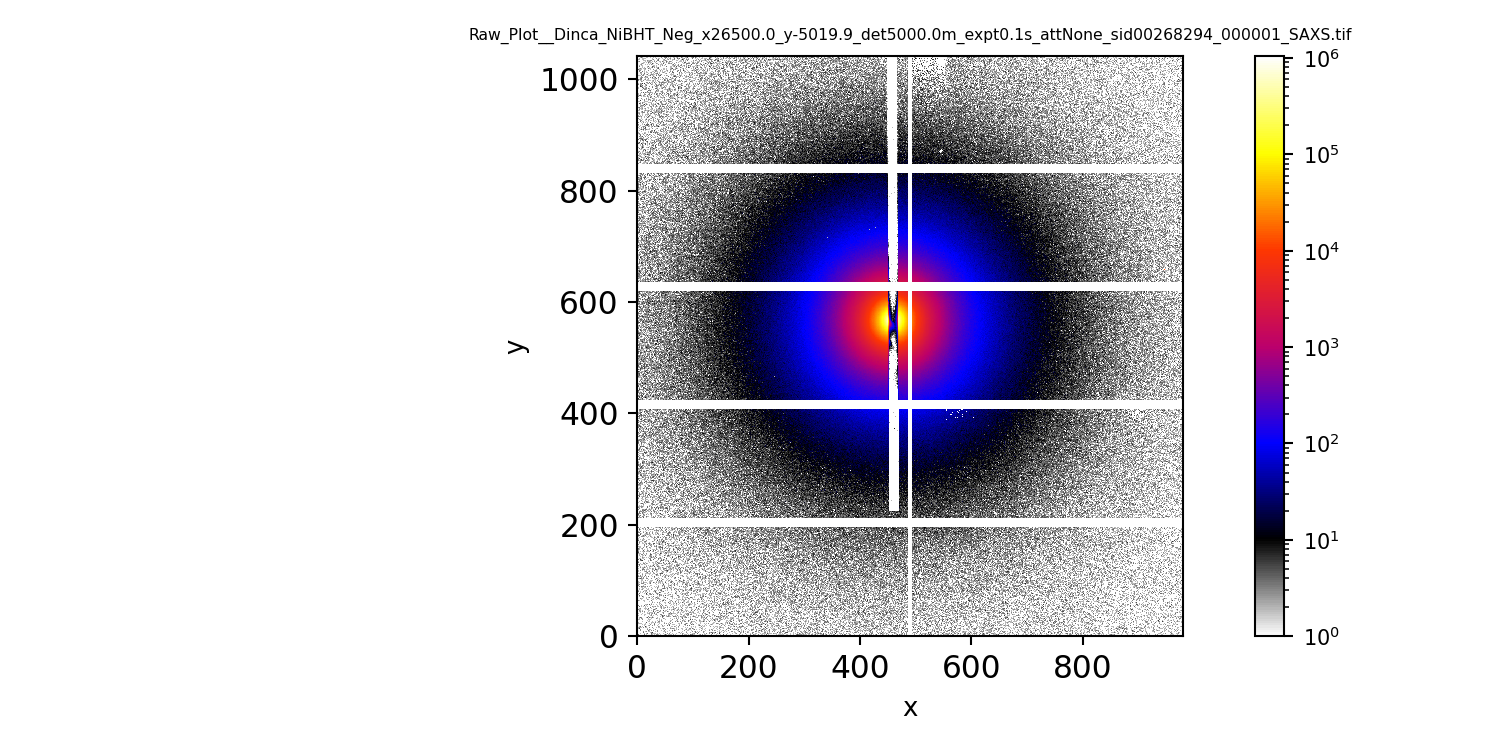

/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg__Dinca_NiBHT_Neg_x26500.0_y-5019.9_det5000.0m_expt0.1s_attNone_sid00268294_000001_SAXS.tif.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/308052_Dinca/Results/SAXS/Cir_Avg/


<IPython.core.display.Javascript object>


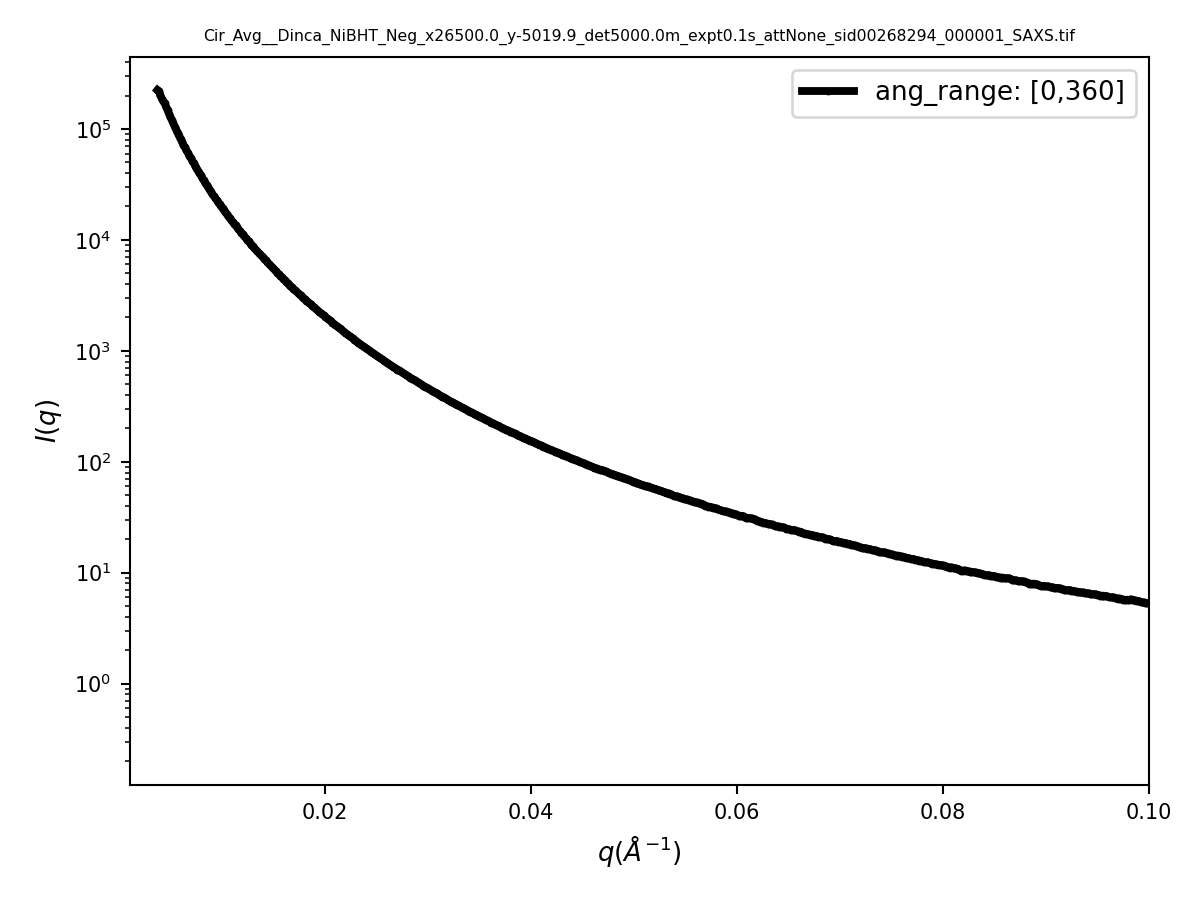

The sample is: _Dinca_NiBHT_Pos.
The filelist for this sample is: ['_Dinca_NiBHT_Pos_x32799.99_y-5019.9_det5000.0m_expt0.1s_attNone_sid00268295_000001_SAXS.tif'].
Directory  /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/308052_Dinca/Results/SAXS/  already exists


<IPython.core.display.Javascript object>


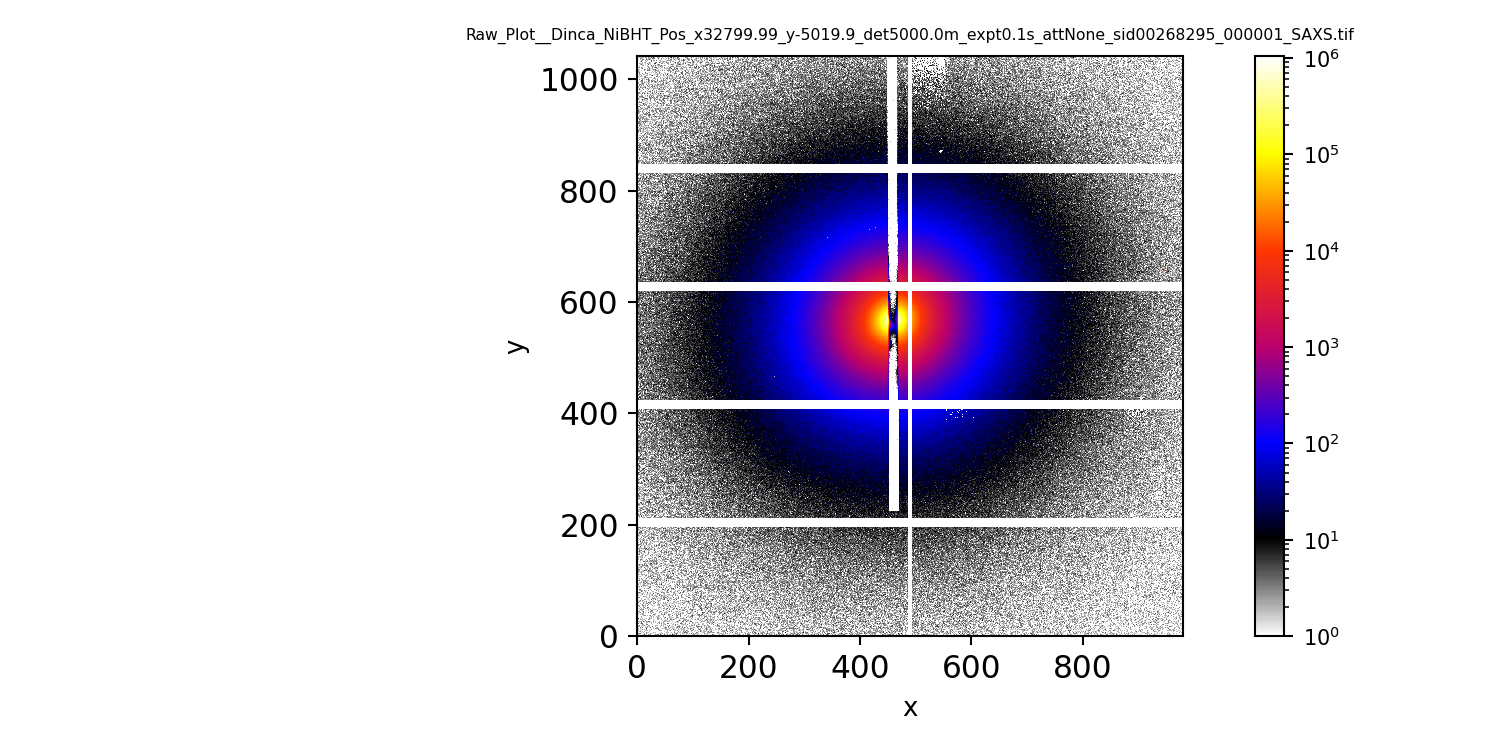

/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg__Dinca_NiBHT_Pos_x32799.99_y-5019.9_det5000.0m_expt0.1s_attNone_sid00268295_000001_SAXS.tif.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/308052_Dinca/Results/SAXS/Cir_Avg/


<IPython.core.display.Javascript object>


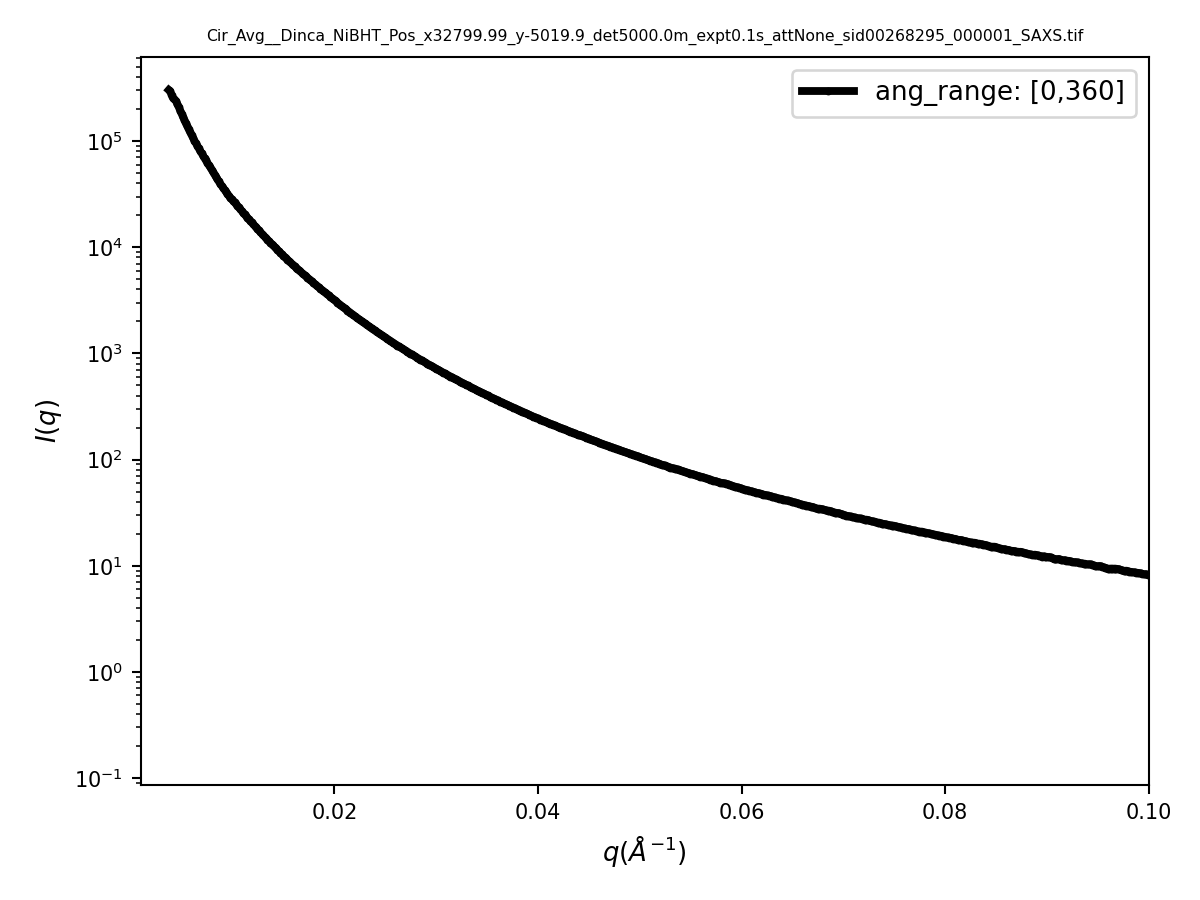

The sample is: _Dinca_TIBQ_COF_DMA.
The filelist for this sample is: ['_Dinca_TIBQ_COF_DMA_x39200.0_y-5019.9_det5000.0m_expt0.1s_attNone_sid00268296_000001_SAXS.tif'].
Directory  /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/308052_Dinca/Results/SAXS/  already exists


<IPython.core.display.Javascript object>


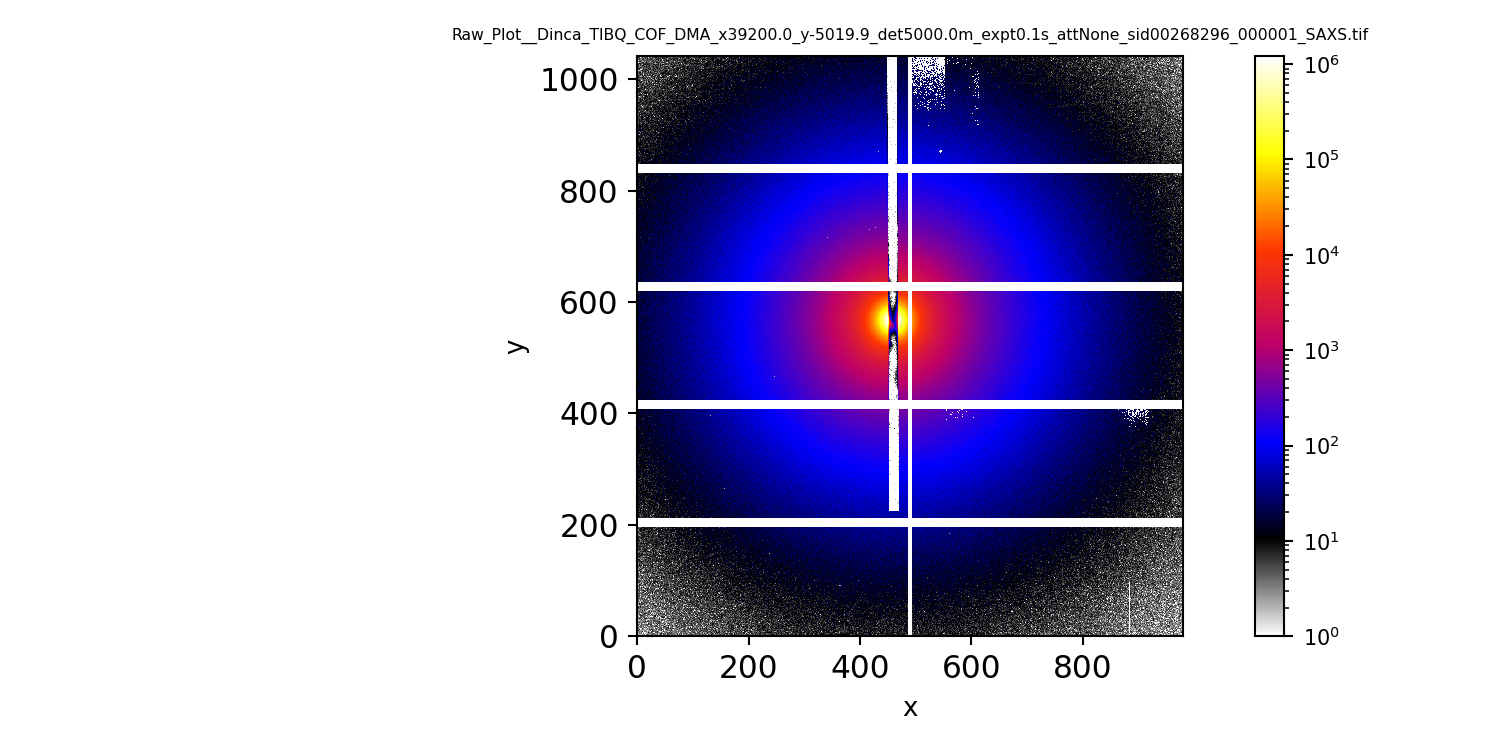

/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg__Dinca_TIBQ_COF_DMA_x39200.0_y-5019.9_det5000.0m_expt0.1s_attNone_sid00268296_000001_SAXS.tif.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/308052_Dinca/Results/SAXS/Cir_Avg/


<IPython.core.display.Javascript object>


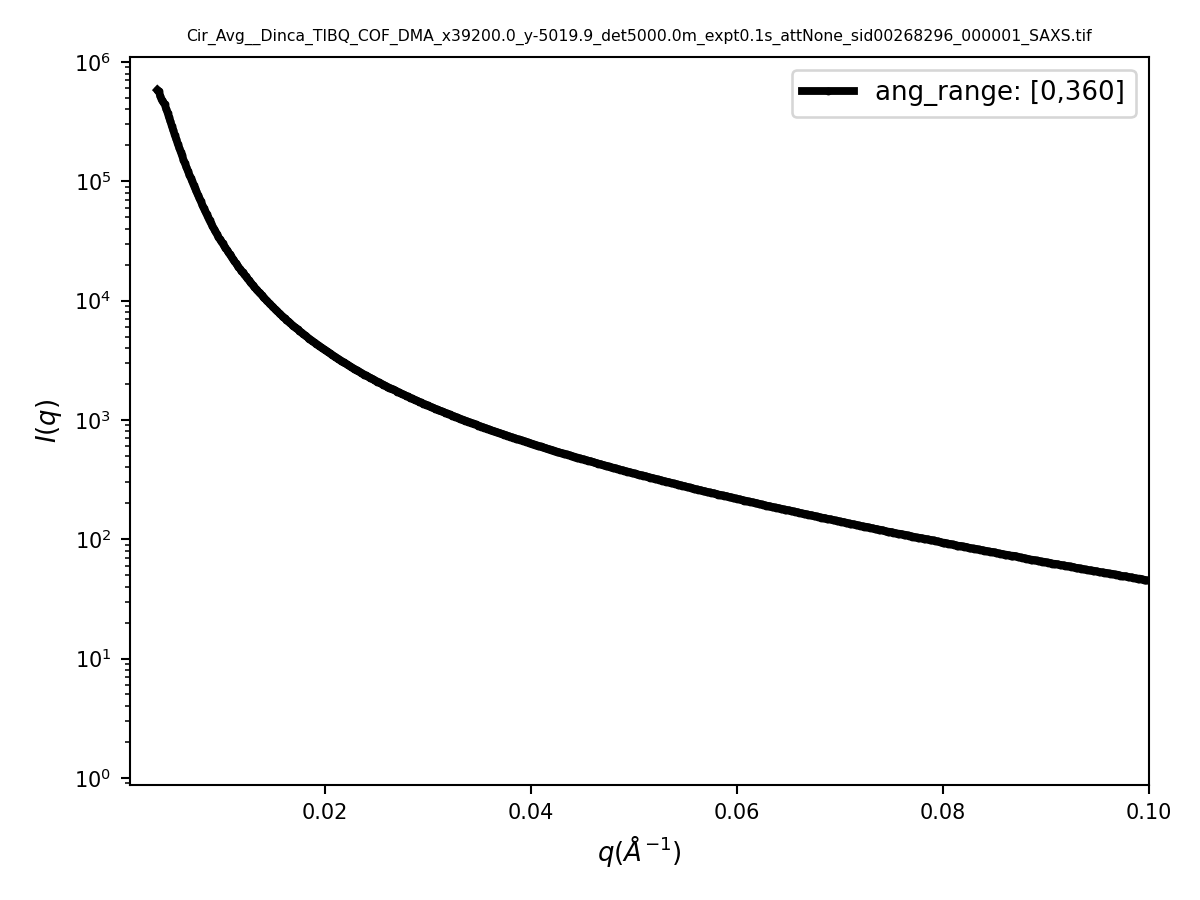

The sample is: _Dinca_TIBA_COF_CTAB.
The filelist for this sample is: ['_Dinca_TIBA_COF_CTAB_x45400.0_y-5019.89_det5000.0m_expt0.1s_attNone_sid00268297_000001_SAXS.tif'].
Directory  /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/308052_Dinca/Results/SAXS/  already exists


<IPython.core.display.Javascript object>


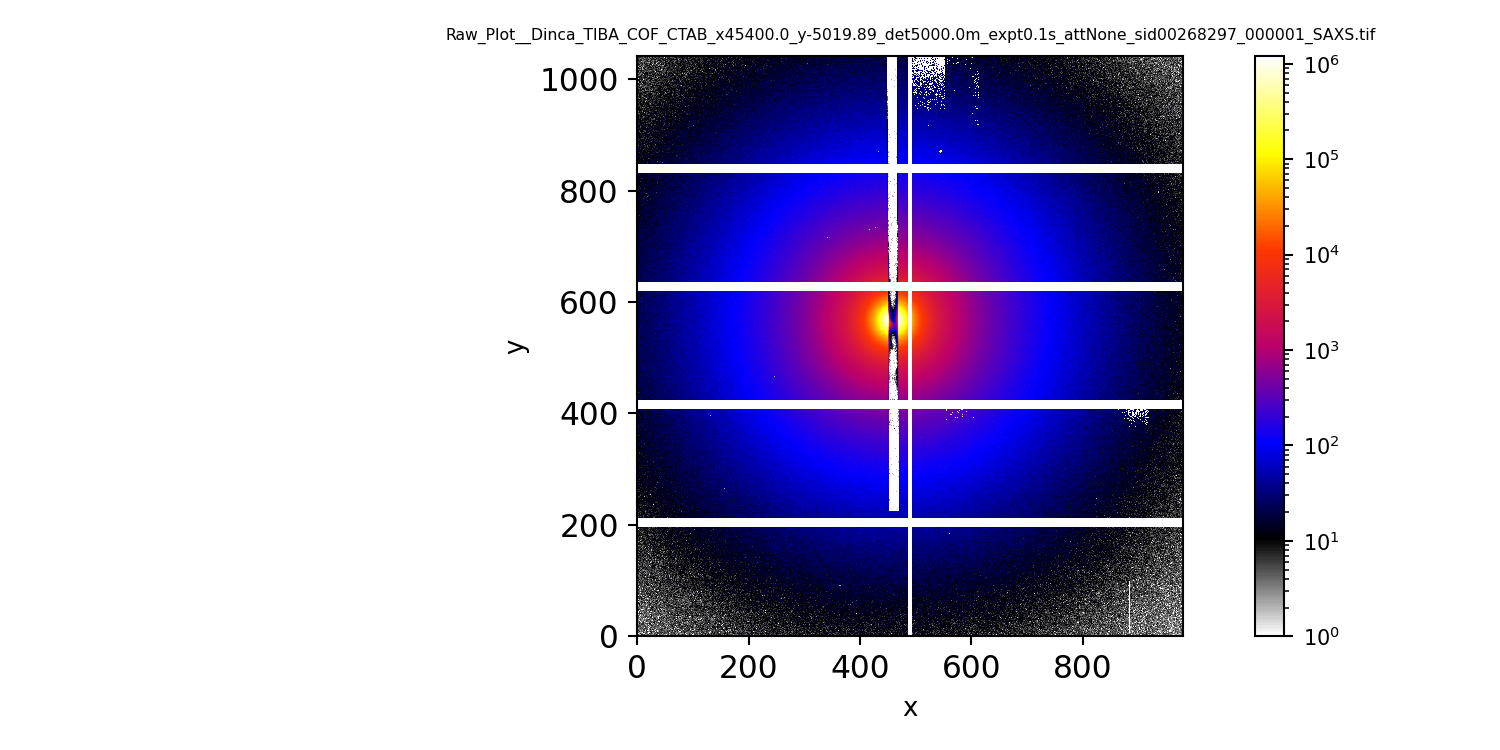

/home/group/Software/pyScatt/pyScatt/plots.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg__Dinca_TIBA_COF_CTAB_x45400.0_y-5019.89_det5000.0m_expt0.1s_attNone_sid00268297_000001_SAXS.tif.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/308052_Dinca/Results/SAXS/Cir_Avg/


<IPython.core.display.Javascript object>


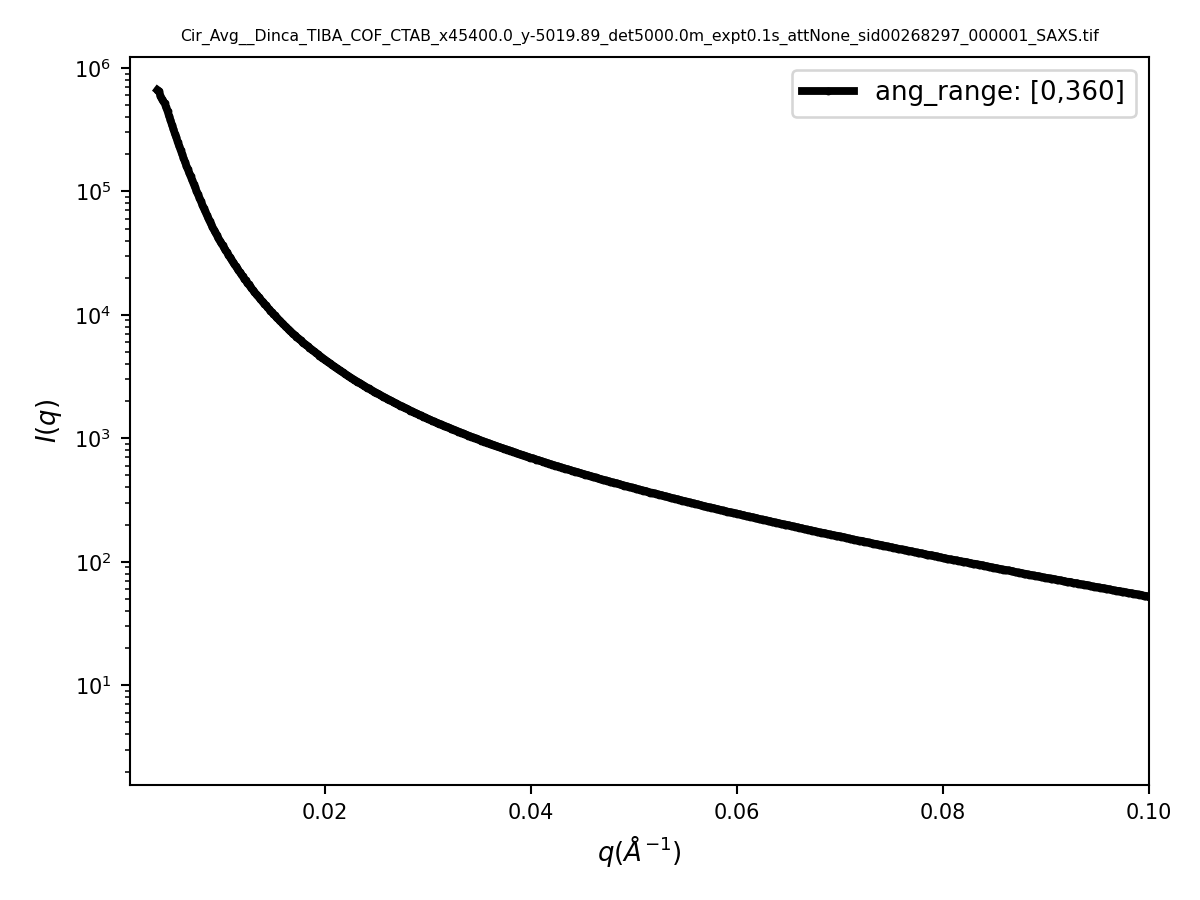

Done


In [18]:
#loop samples
for sam in sample_list: 
    print( 'The sample is: %s.'%sam)    
    fps = sam_dict[sam] [:]
    print( 'The filelist for this sample is: %s.'%fps)  
    full_filenames = [ inDir +  fp for fp in fps   ] 
    N =  len(full_filenames)        
    RES = {}
    PATH = 'SAXS'
    pargs_sc['outDir'] = create_fullpath( outDir + PATH + '/')         
    try:
        pz = float( re.search(   r'(_z)(.*)()', sam ).group()[2:]  )
    except:
        pz = 1400 #0 
    pargs_sc['sdd_mm'] = sdd_mm  - pz/1000.         
    SC = SMI_Scattering( pargs_sc  ) 
    SC.md['sample'] = sam
    SC.load_data( full_filenames )   
    SC.saved_plots, SC.saved_data  = {}, {} 
    RES['Data'] = {}
    #N = 2 
    for i in range(N):
        res = {}
        #######################################
        #plot the raw data
        ########################################
        if do_plot_raw:
            run_plot_raw( SC, ki=i,  vmin= None, vmax=None,mask=None, fontsize=6, )  
        #######################################
        #plot qimg
        ########################################              
        if do_qimg:
            qimg, qx, qz = SC.img_to_qimg( img = SC.imgs[i], bins=None, 
                                           mask= mask, x='Qr', y='Qz', method = 'ai'  )            
            run_save_qimage(  SC, ki=i  )  
            run_plot_qimage(  SC, ki=i  )             
            
        #######################################
        #Do circular average
        ########################################  
        if do_ciravg: 
            q_ca,iq_ca = SC.img_circular_average(img=SC.imgs[i],Qrange=None,Prange=None,
                                                     bins=1500,method='ai',mask=mask)
            run_save_ciravg(  SC, ki=i  )  
            peaks = None 
            xlim=[0.001,0.1]
            run_plot_ciravg( SC, ki =i, peaks = peaks,xlim=xlim, ylim=None,fontsize=6, )             
        #######################################
        #Do sector circular average
        ########################################  
        if do_ciravg_sector:  
            Prange =   [ [w-ciravg_sector_angle_wid, w+ciravg_sector_angle_wid] for w in  ciravg_sector_angles  ]
            qiqs_cas  = SC.img_circular_average_sector( img=SC.imgs[i], 
                                        Qrange=None,Prange=Prange,bins=1500,mask= mask ) 
            run_save_ciravg_sector( SC, ki=i  )
            run_plot_ciravg_sector( SC, ki=i ) #, xlim=[0,8], ylim=[.1, 1e5]  )      
   
        #######################################
        #Do q-phi analysis
        ########################################              
        if do_qphi:  
            qphi_bins = [ 500, 180 ];Prange= None;Qrange=None;     
            q_QP, phi_QP, qphi_QP = SC.img_to_qphi(img=SC.imgs[i],Qrange=Qrange,Prange=Prange,                                                      
                                                      bins=qphi_bins,method='ai',mask=mask)
            run_save_Qqphi( SC, ki=i  )
            run_plot_Qqphi( SC, ki=i, fontsize=6, vmin= None, vmax=None, aspect= 0.00035, ) 
            if do_q_qphi:
                q_QPq,  iq_QPq = SC.qphi_to_iq( qphi_QP, q_range=q_QP, p_range=phi_QP, )
                run_save_q_iq_qphi( SC,ki=i )
                run_plot_q_iq_qphi( SC,ki=i, peaks = None, xlim= None, ylim=None,fontsize=6, )
            if do_p_qphi:  
                q_range_roi = None 
                #q_range_roi = [ 2.65-.05, 2.65 + .05 ]
                p_QPp,  ip_QPp = SC.qphi_to_ip( qphi_QP, q_range=q_QP, p_range=phi_QP, Qrange=q_range_roi ) 
                run_save_p_ip_qphi( SC,ki=i )
                run_plot_p_ip_qphi( SC,ki=i, peaks = None, xlim= None, ylim=None,fontsize=6, )
         
        
        #####################
        ## save data to h5 file 
        res = SC.res_to_dict(  do_stitch=do_stitch, 
                 do_ciravg = do_ciravg, do_ciravg_sector = do_ciravg_sector,
                 do_qimg=do_qimg, do_qphi = do_qphi,  
                 do_q_qphi = do_q_qphi, do_p_qphi = do_p_qphi,                         
                        ) 
        RES['Data'][ SC.md['filenames'][i] ] = res 
 
    K='saved_data';SC.md[K] = SC.saved_data
    K='saved_plots';SC.md[K] = SC.saved_plots    
    RES['md']= SC.md   
 
    
    
    if save_raw:
        res2 = SC.res_to_dict(  save_raw=True )
        RES.update( res2   )
    dicttoh5( RES, os.path.join(outDir_HDF, '%s.h5'%sam),
                         h5path='/%s/'%PATH, mode='a', overwrite_data=True)  
 
    
    
print('Done') 



# THE END